
## 2.4	激活函数模块：torch.nn.functional

本节将介绍四种常用的激活函数及其基本使用

### 2.4.1	Sigmoid函数
Sigmoid函数在物理意义上最接近生物神经元

使用matplotlib包来绘制sigmoid函数图像，代码如下

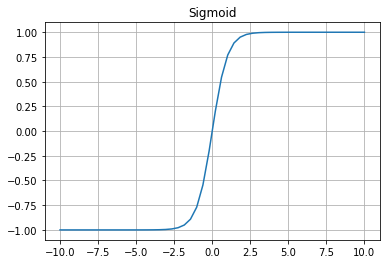

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig = plt.figure()
# plot sigmoid
ax = fig.add_subplot()
ax.plot(x,y_tanh)
ax.grid()
ax.set_title('Sigmoid')
plt.show()

随机生成一个1*4的张量作为输入，则手动实现sigmoid激活函数的代码如下

In [4]:
import numpy as np
import torch

input_x = torch.randn(4)
print(input_x)

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
sigmoid(input_x)

tensor([1.3286, 0.0300, 0.4329, 1.0827])


tensor([0.7906, 0.5075, 0.6066, 0.7470])

在调用激活函数的时候，不需要像手动实现公式，直接调用torch.nn函数即可，里面已经封装好了常用的所有激活函数

In [5]:
input_x = torch.randn(4)
print(input_x)
output = torch.sigmoid(input_x)
print(output)

tensor([ 1.1902,  1.2787, -0.6267,  0.3341])
tensor([0.7668, 0.7822, 0.3483, 0.5828])


### 2.4.2 Tanh函数

使用matplotlib包来绘制Tanh函数图像，代码如下

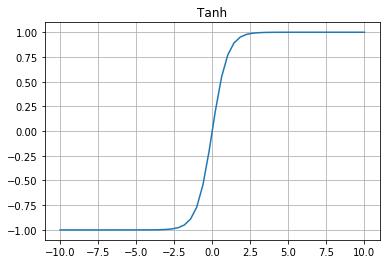

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x,y_tanh)
ax.grid()
ax.set_title('Tanh')
plt.show()

下面我们手动实现tanh激活函数，依然生成随机张量参与计算，则手动实现tanh函数的代码如下

In [7]:
import numpy as np
import torch

input_x = torch.randn(4)
print(input_x)

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
tanh(input_x)

tensor([ 1.1375, -1.1033,  1.4262,  0.4877])


tensor([ 0.8136, -0.8017,  0.8909,  0.4524])

在实际使用的时候，我们直接调用现成的函数即可

In [8]:
import torch

input_x = torch.randn(4)
print(input_x)

output = torch.tanh(input_x)
print(output)

tensor([-0.1574, -0.2590,  0.7387, -0.1653])
tensor([-0.1561, -0.2533,  0.6284, -0.1638])


### 1.4.3	Relu函数

Relu是修正线性单元（The Rectified Linear Unit）的简称

使用matplotlib包来绘制Relu函数图像，代码如下

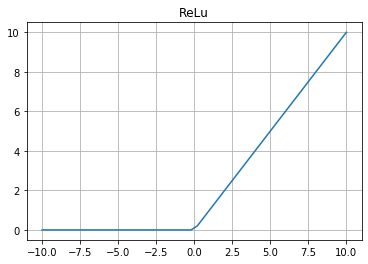

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig = plt.figure()
ax = fig.add_subplot()
y_relu = np.array([0*item  if item<0 else item for item in x ])
ax.plot(x,y_relu)
ax.grid()
ax.set_title('ReLu')
plt.show()

下面我们手动实现Relu激活函数，代码如下

In [10]:
import numpy as np
import torch

input_x = torch.randn(4)
print(input_x)

def relu(x):
    x = np.where(x >= 0, x, 0)
    return torch.tensor(x)
relu(input_x)

tensor([-1.8239, -1.3646,  1.0438,  0.1396])


tensor([0.0000, 0.0000, 1.0438, 0.1396])

实际使用时的调用方法如下

In [11]:
import torch

input_x = torch.randn(4)
print(input_x)

output = torch.nn.functional.relu(input_x)
print(output)

tensor([ 0.0439, -0.7945, -1.0825,  0.9218])
tensor([0.0439, 0.0000, 0.0000, 0.9218])


### 1.4.4	LeakyRelu函数

Leaky Relu解决了一部分Relu存在的可能杀死神经元的问题

使用matplotlib包来绘制LeakyRelu函数图像，代码如下

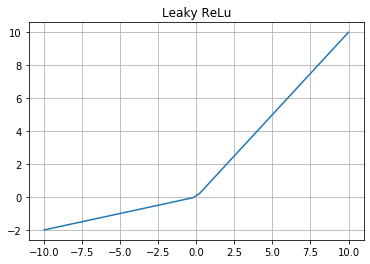

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10)
y_sigmoid = 1/(1+np.exp(-x))
y_tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

fig = plt.figure()
ax = fig.add_subplot()
y_relu = np.array([0.2*item  if item<0 else item for item in x ])
ax.plot(x,y_relu)
ax.grid()
ax.set_title('Leaky ReLu')
plt.show()

下面我们手动实现LeakyRelu激活函数，代码如下

In [17]:
import numpy as np
import torch

input_x = torch.randn(4)
print(input_x)

def leakyrelu(x, gamma):
    x = np.where(x > 0, x, x*gamma)
    return torch.tensor(x)
leakyrelu(input_x, 0.01)

tensor([-0.6957,  0.1582,  0.1538, -0.5933])


tensor([-0.0070,  0.1582,  0.1538, -0.0059])

使用torch调用实现LeakyRelu函数的代码如下

In [20]:
import numpy as np
import torch

input_x = torch.randn(4)
print(input_x)

output = torch.nn.functional.leaky_relu(input_x, 0.01)
print(output)

tensor([0.7407, 1.7381, 1.7765, 0.5267])
tensor([0.7407, 1.7381, 1.7765, 0.5267])
